# Project 4: Clustering

Data set: Netflix Prize - https://www.kaggle.com/netflix-inc/netflix-prize-data?select=combined_data_4.txt

My goal for this project is to be able to cluster netflix users based off of their ratings given to various movies. Given said clusters, recommendations for movies or shows to watch could be made.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Starting with just a subset of the entire data just to get code up and running

In [2]:
ratings = pd.read_csv('netflix/combined_data_all.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

Note: the format of the ratings file is grouped by movie id. Each row with a movie ID will have a null rating following it. There are 17770 movie's provided so that should be the number of nulls.

### Initial data inspection

In [3]:
''' From README:
The file "training_set.tar" is a tar of a directory containing 17770 files, one
per movie.  The first line of each file contains the movie id followed by a
colon.  Each subsequent line in the file corresponds to a rating from a customer
and its date in the following format:
'''
'''
note this "training_set.tar" was renamed to combined_data in a .txt format. The null rows indicate 
the movie ID column. These movie ID's will need to be converted to a column so that it will match
a DataFrame format. 
'''
ratings['Rating'].isna().sum()

17770

In [4]:
ratings.shape

(100498277, 2)

100 millions rows :O 

In [5]:
ratings.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
ratings.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


Visualizing rating distribution

In [7]:
movie_count = ratings['Rating'].isnull().sum()
cust_count = ratings['Cust_Id'].nunique() - movie_count
ratings_count = ratings['Cust_Id'].count() - movie_count

In [8]:
print("Number of movies:\t\t", movie_count)
print("Number of unique customers:\t", cust_count)
print("Total number of ratings:\t", ratings_count)

Number of movies:		 17770
Number of unique customers:	 480189
Total number of ratings:	 100480507


In [9]:
ratings_grouped = ratings.groupby('Rating')['Rating'].agg(['count'])

[Text(0.5, 1.0, 'Distribution of Ratings')]

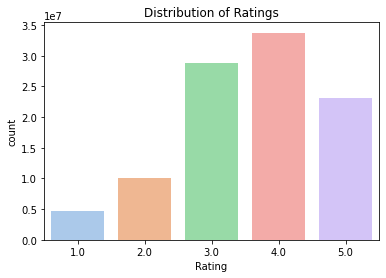

In [10]:
sns.barplot(data = ratings_grouped, y = 'count', x = ratings_grouped.index, palette = 'pastel').set(title = 'Distribution of Ratings')

### Data Processing

The sheer size of the data set makes things a bit more challenging then previoes data that I have worked with. 100 million rows is a LOT of processing for any single computer. My goal is to keep my code optimized so that my laptop can still handle things, rather than throw more resources at the problem such as a cloud host.

In [11]:
'''
There is a separate CSV that contains the corresponding movie title
for each movie ID. This may be useful for visualizations or other
types of analysis but in our case I don't think it will be needed.
The numeric value of ID is all we need for model training.
'''

#import movie titles csv
#encoding: ISO-8859-15

#movies = pd.read_csv('netflix/movie_titles.csv', encoding = 'iso8859_15', header=None )

"\nThere is a separate CSV that contains the corresponding movie title\nfor each movie ID. This may be useful for visualizations or other\ntypes of analysis but in our case I don't think it will be needed.\nThe numeric value of ID is all we need for model training.\n"

In [12]:
#get indices of Movie ID rows
movies = pd.DataFrame(pd.isnull(ratings.Rating))
movies = movies[movies['Rating'] == True]
movies = movies.reset_index()
movie_rows = np.array(movies['index'], dtype = np.int64)

In [13]:
pd.DataFrame(movie_rows)

,0
0,0
1,548
2,694
3,2707
4,2850
...,...
17765,100488431
17766,100489037
17767,100489242
17768,100490605


In [14]:
len(movie_rows)

17770

In [15]:
#fast way to generate movie id column
new_rows = np.empty(len(ratings), dtype='int64')
temp = 0
for i, j in enumerate(movie_rows):
    if (i+1) == len(movie_rows):
        new_rows[j:len(ratings)] = (i+1)
    new_rows[temp:j] = i
    temp = j

In [16]:
#verify columns is correct length
print(len(ratings))
print(len(new_rows))

100498277
100498277


In [17]:
len(movie_rows)

17770

In [18]:
print(new_rows[len(ratings)-1])

17770


In [19]:
pd.DataFrame(new_rows)

,0
0,1
1,1
2,1
3,1
4,1
...,...
100498272,17770
100498273,17770
100498274,17770
100498275,17770


In [20]:
#merge Movie ID columns with original DF
full_data = ratings
full_data['Movie_Id'] = new_rows
full_data.drop(index=movie_rows, inplace = True)

In [21]:
full_data.isna().any()

Cust_Id     False
Rating      False
Movie_Id    False
dtype: bool

In [22]:
full_data

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
100498272,1790158,4.0,17770
100498273,1608708,3.0,17770
100498274,234275,1.0,17770
100498275,255278,4.0,17770


In [23]:
del ratings

The data is still very large and I am wary that trying to run a model 
on the data as is will crash the kernel. In an effort to reduce the 
amount of data, we'll remove customers with little reviews given and 
then movies when little reviews received.

In [24]:
from scipy import stats

In [54]:
cust_rating_count = full_data['Cust_Id'].value_counts()
movie_ratings_count = full_data['Movie_Id'].value_counts()

In [40]:
len(cust_rating_count)

480189

In [58]:
movie_ratings_count.tail(10)

8964     25
16875    23
12418    22
4711     22
8146     14
4806     13
6256     10
11344    10
11148     5
13755     3
Name: Movie_Id, dtype: int64

In [57]:
movie_ratings_count.describe()

count     17770.000000
mean       5654.502364
std       16909.673269
min           3.000000
25%         192.000000
50%         561.000000
75%        2667.750000
max      232944.000000
Name: Movie_Id, dtype: float64

In [27]:
'''
TODO
DROPPING DATA
'''

'\nTODO\nDROPPING DATA\n'

In [36]:
pd.DataFrame(cust_rating_count).describe()

,Cust_Id
count,480189.000000
mean,209.251997
std,302.339155
min,1.000000
25%,39.000000
50%,96.000000
75%,259.000000
max,17653.000000


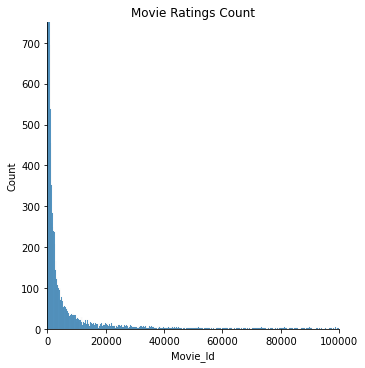

In [77]:
sns.displot(movie_ratings_count).set(ylim = (0, 750), xlim = (0, 100000), title = 'Movie Ratings Count')

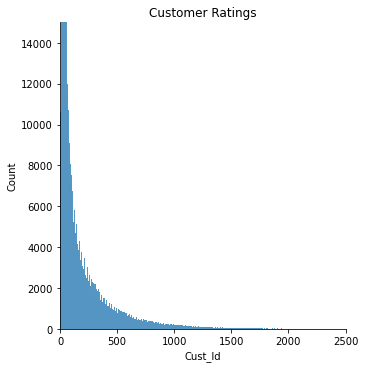

In [76]:
sns.displot(cust_rating_count).set(ylim = (0, 15000), xlim = (0, 2500), title = 'Customer Ratings')

In [78]:
cust_low_threshold = cust_rating_count[cust_rating_count < 5].index
cust_high_threshold = cust_rating_count[cust_rating_count > 2000].index